In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [49]:
df = pd.read_csv('advertising.csv')
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [50]:
df.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [51]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [52]:
df_tv = df['TV']
df_radio = df['Radio']
df_newspaper = df['Newspaper']
df_sales = df['Sales']

In [53]:
print(f"Correlation between TV and Sales: {df_tv.corr(df_sales)}")
print(f"Correlation between Radio and Sales: {df_radio.corr(df_sales)}")
print(f"Correlation between Newspaper and Sales: {df_newspaper.corr(df_sales)}")

Correlation between TV and Sales: 0.9012079133023306
Correlation between Radio and Sales: 0.3496310970076693
Correlation between Newspaper and Sales: 0.15796002615492621


In [54]:
print(f"df_tv: {df_tv.shape} df_radio: {df_radio.shape} df_newspaper: {df_newspaper.shape} df_sales: {df_sales.shape}\n")
print("There is need to create 2D array in order to work with features in linear regression..")

df_tv: (200,) df_radio: (200,) df_newspaper: (200,) df_sales: (200,)

There is need to create 2D array in order to work with features in linear regression..


In [55]:
# 2D features
tv_2d = df_tv.values.reshape(-1,1)
radio_2d = df_radio.values.reshape(-1,1)
newspaper_2d = df_newspaper.values.reshape(-1,1)

# 2D label
sales_2d = df_sales.values.reshape(-1,1)

Linear Regression between TV and Sales

In [56]:
X_train, X_test, y_train, y_test = train_test_split(tv_2d, sales_2d, test_size=0.2, random_state=42)

In [57]:
clf = LinearRegression()

In [58]:
clf.fit(X_train, y_train)

LinearRegression()

In [59]:
# Predict on the test set
y_pred = clf.predict(X_test)

In [60]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2s = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R2 Score: {r2s}")

Mean Squared Error: 6.101072906773964
Root Mean Squared Error: 2.470035001123256
R2 Score: 0.802561303423698


In [61]:
# Print the coefficients
print(f"Coefficients: {clf.coef_}")
print(f"Intercept: {clf.intercept_}")

Coefficients: [[0.05548294]]
Intercept: [7.00710843]


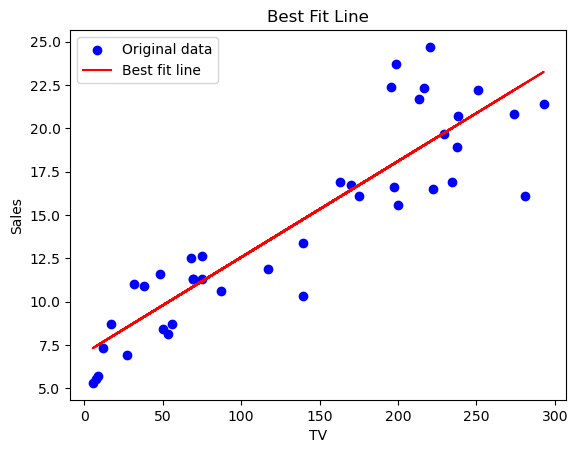

In [62]:
# Plot the original data points
plt.scatter(X_test, y_test, color='blue', label='Original data')

# Plot the best fit line
plt.plot(X_test, y_pred, color='red', label='Best fit line')

plt.title('Best Fit Line')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.legend()
plt.show()

Linear Regression between Radio and Sales

In [63]:
X_train, X_test, y_train, y_test = train_test_split(radio_2d, sales_2d, test_size=0.2, random_state=42)

In [64]:
clf1 = LinearRegression()
clf1.fit(X_train, y_train)
y_pred = clf1.predict(X_test)

In [65]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2s = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R2 Score: {r2s}")

Mean Squared Error: 27.595581948583174
Root Mean Squared Error: 5.253149716939655
R2 Score: 0.10697088619553419


In [66]:
# Print the coefficients
print(f"Coefficients: {clf1.coef_}")
print(f"Intercept: {clf1.intercept_}")

Coefficients: [[0.12000114]]
Intercept: [12.58552398]


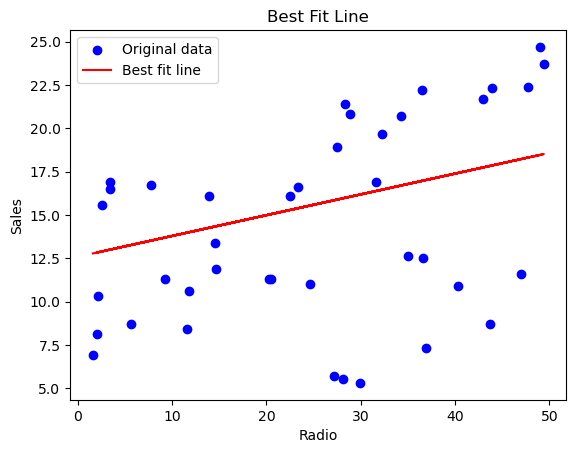

In [67]:
# Plot the original data points
plt.scatter(X_test, y_test, color='blue', label='Original data')

# Plot the best fit line
plt.plot(X_test, y_pred, color='red', label='Best fit line')

plt.title('Best Fit Line')
plt.xlabel('Radio')
plt.ylabel('Sales')
plt.legend()
plt.show()

Linear Regression between Newspaper and Sales

In [68]:
X_train, X_test, y_train, y_test = train_test_split(newspaper_2d, sales_2d, test_size=0.2, random_state=42)

In [69]:
clf2 = LinearRegression()
clf2.fit(X_train, y_train)
y_pred = clf2.predict(X_test)

In [70]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2s = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R2 Score: {r2s}")

Mean Squared Error: 30.759376922769615
Root Mean Squared Error: 5.546113677411383
R2 Score: 0.004586344085821592


In [71]:
# Print the coefficients
print(f"Coefficients: {clf2.coef_}")
print(f"Intercept: {clf2.intercept_}")

Coefficients: [[0.03717439]]
Intercept: [14.21741479]


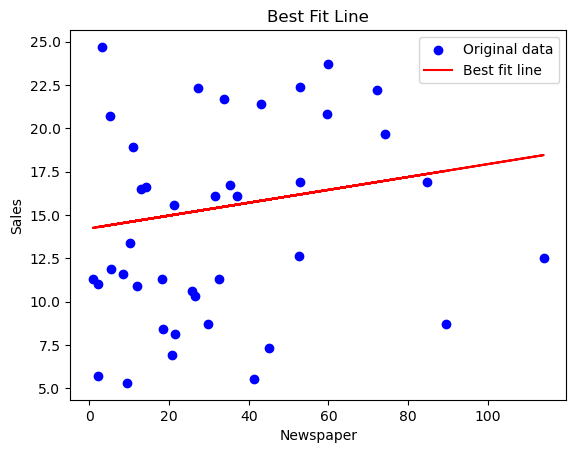

In [72]:
# Plot the original data points
plt.scatter(X_test, y_test, color='blue', label='Original data')

# Plot the best fit line
plt.plot(X_test, y_pred, color='red', label='Best fit line')

plt.title('Best Fit Line')
plt.xlabel('Newspaper')
plt.ylabel('Sales')
plt.legend()
plt.show()